## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [5]:
df.shape

(130, 3)

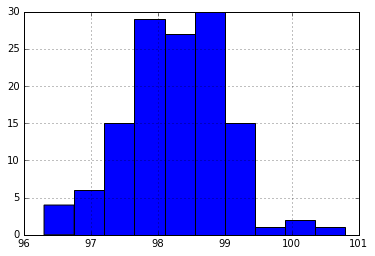

In [6]:
%matplotlib inline
#q1: is distribution normal?
df.temperature.hist() #histogram does not appear normal, but small sample

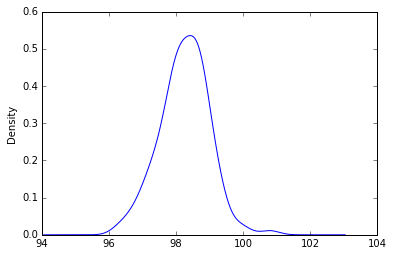

In [7]:
df['temperature'].plot(kind='kde')
#kde plot appears normally distributed with a small bump around 101 (people with fevers?)

In [9]:
from scipy import stats

In [10]:
#scipy test whether distribution is normal
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [ ]:
"""p-value of 25% shows no statistically significant difference from a normal distribution"""

In [8]:
#q2: test whether sample mean is 98.6
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [9]:
"""T test shows population mean is NOT equal to 98.6 with a p-value of 2.4e-7, i.e.,
if the population mean were 98.6, less than 1 in 1 million chance the sample mean would differ this far from 98.6
by random chance.
A Z test would have worked fine, as the sample size is large enough (130) that normal distribution and t distribution
are pretty much identical, but I used a t test because it's built into scipy."""

"T test shows population mean is NOT equal to 98.6 with a p-value of 2.4e-7, i.e.,\nif the population mean were 98.6, less than 1 in 1 million chance this sample would be returned.\nA Z test would have worked fine, as the sample size is large enough (130) that normal distribution and t distribution\nare pretty much identical, but I used a t test because it's built into scipy."

In [11]:
#q4: test whether male and female have different body temperatures
male = df[df.gender == 'M']
female = df[df.gender == 'F']

In [15]:
stats.ttest_ind(male.temperature, female.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [16]:
"""T test shows they are different with a p-value of 2%, i.e., 2% chance the samples would differ this much
by chance if the population means were equal."""

'T test shows they are different with a p-value of 2%, i.e., 2% chance the samples would differ this much\nby chance if the population means were equal.'

In [17]:
"""Check actual means and standard deviations just to have a better sense"""
print 'Sample mean is %f and standard deviation is %f' % (df.temperature.mean(), df.temperature.std())

Sample mean is 98.249231 and standard deviation is 0.733183


In [18]:
print 'Male mean is %f and standard deviation is %f' % (male.temperature.mean(), male.temperature.std())

Male mean is 98.104615 and standard deviation is 0.698756


In [19]:
print 'Female mean is %f and standard deviation is %f' % (female.temperature.mean(), female.temperature.std())

Female mean is 98.393846 and standard deviation is 0.743488


In [21]:
#q3: when should we consider abnormal?
"""I don't know how to define abnormal but 95% of body temperatures should be within 2 standard deviations of
the mean.  So if we define abnormal as more than 2 SDs away, then:"""
print """Normal temperatures are between %f and %f""" % (df.temperature.mean() - 2 * df.temperature.std(),
                                                        df.temperature.mean() + 2 * df.temperature.std())

Normal temperatures are between 96.782864 and 99.715597


In [22]:
"""Or if we do it separately for men and women:"""
print """Normal temperatures for men are between %f and %f""" % (male.temperature.mean() - 2 * male.temperature.std(),
                                                        male.temperature.mean() + 2 * male.temperature.std())
print """Normal temperatures for women are between %f and %f""" % (female.temperature.mean() - 2 * female.temperature.std(),
                                                        female.temperature.mean() + 2 * female.temperature.std())

Normal temperatures for men are between 96.707104 and 99.502127
Normal temperatures for women are between 96.906871 and 99.880822
